In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [3]:
train_dir = r'E:\PARKINSON\3_cls\train'
test_dir = r'E:\PARKINSON\3_cls\test'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=3916,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=723,
    class_mode='binary',
    color_mode='grayscale'
)

Found 3916 images belonging to 2 classes.
Found 723 images belonging to 2 classes.


In [4]:
# Create the image-label datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

##### The final preprocessing step is to resize the labels to an (l x 1) array, then preview an image and label to ensure that the correct labels are
##### corresponding with the respective images.

In [5]:
train_labels_final = np.reshape(train_labels[:3916], (3916,1))
#val_labels_final = np.reshape(val_labels[:,0], (16,1))
test_labels_final = np.reshape(test_labels[:723], (723,1))

In [6]:
# Create the Validation Dataset
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, train_size=0.9, test_size=0.1, random_state=42)# Create the Test and Final Training Datasets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.78, random_state=42)

In [7]:
labels = ['CONTROL', 'PD']

In [8]:
x_train.shape

(2748, 150, 150, 1)

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), padding='valid',activation = 'relu',kernel_initializer='he_uniform',
                        input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), padding='valid',activation = 'relu',kernel_initializer='he_uniform',
                        input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), padding='valid',activation = 'relu',kernel_initializer='he_uniform',
                        input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), padding='valid',activation = 'relu',kernel_initializer='he_uniform',
                        input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),#0.001
             metrics=['acc'])

In [ ]:
tensorBoard = TensorBoard(log_dir="logs")
checkPoint = ModelCheckpoint("parkinson.h5",
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.1,
                             patience=2,
                             verbose=1,
                             mode='auto',
                             min_delta=0.001)
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   verbose=1,
                   mode='auto',
                   restore_best_weights=True) 

In [13]:
history = model.fit(train_images,
                    train_labels_final,
                    epochs=20,
                    validation_data=(x_val,y_val))
#print("Stored Results")
 # d['loss'] = history.history['loss'] 
  #print('='*125) # Add a partition in between optimizer results

Epoch 1/20
123/123 [==============================] - 100s 798ms/step - loss: 0.2490 - acc: 0.8792 - val_loss: 0.1912 - val_acc: 0.8980
Epoch 2/20
123/123 [==============================] - 97s 789ms/step - loss: 0.2005 - acc: 0.8999 - val_loss: 0.2541 - val_acc: 0.8980
Epoch 3/20
123/123 [==============================] - 97s 785ms/step - loss: 0.1838 - acc: 0.9114 - val_loss: 0.1708 - val_acc: 0.9413
Epoch 4/20
123/123 [==============================] - 96s 780ms/step - loss: 0.1756 - acc: 0.9127 - val_loss: 0.1547 - val_acc: 0.9439
Epoch 5/20
123/123 [==============================] - 92s 751ms/step - loss: 0.1586 - acc: 0.9252 - val_loss: 0.1440 - val_acc: 0.9184
Epoch 6/20
123/123 [==============================] - 94s 761ms/step - loss: 0.1468 - acc: 0.9354 - val_loss: 0.1211 - val_acc: 0.9617
Epoch 7/20
123/123 [==============================] - 93s 752ms/step - loss: 0.1333 - acc: 0.9408 - val_loss: 0.1310 - val_acc: 0.9260
Epoch 8/20
123/123 [==============================] - 

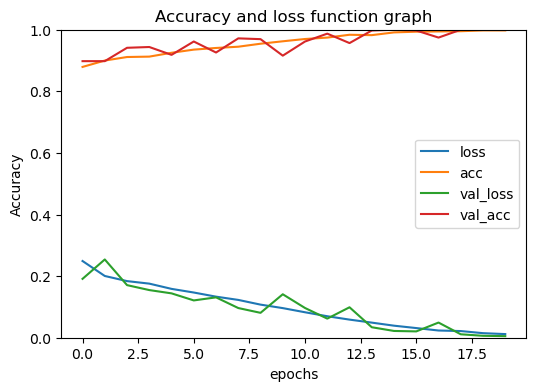

In [14]:
pd.DataFrame(history.history).plot(figsize=(6,4))
plt.grid(False)
plt.gca().set_ylim(0,1)
plt.title('Accuracy and loss function graph')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [15]:
model.evaluate(x_val,y_val)

13/13 [==============================] - 1s 82ms/step - loss: 0.0051 - acc: 1.0000


[0.005096137057989836, 1.0]

In [16]:
model.evaluate(x_test,y_test)

25/25 [==============================] - 2s 86ms/step - loss: 0.0051 - acc: 1.0000


[0.005083899945020676, 1.0]

In [17]:
model.evaluate(test_images,test_labels_final)

23/23 [==============================] - 2s 88ms/step - loss: 0.1602 - acc: 0.9488


[0.16024614870548248, 0.9488243460655212]

1/1 [==============================] - 0s 133ms/step
[[4.7349105e-05]]
[0.]


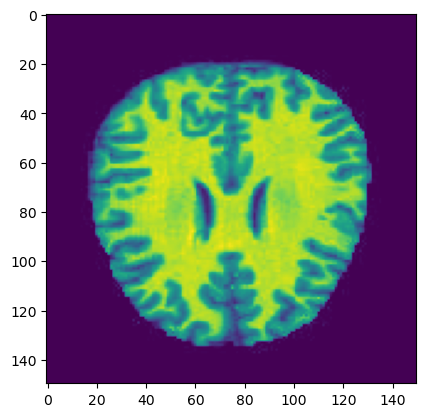

In [18]:
n=3
img=test_images[n]
plt.imshow(img)
input_img=np.expand_dims(img,axis=0)
print(model.predict(input_img))
print(test_labels_final[n])

1/1 [==============================] - 0s 30ms/step
[[2.0145534e-07]]
0.0


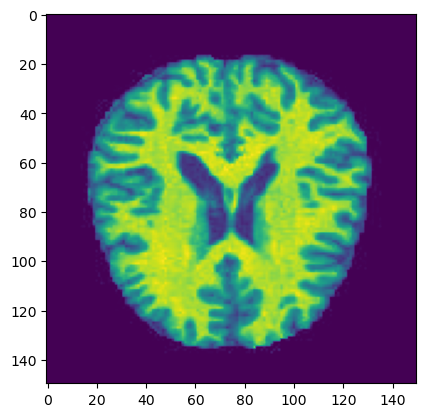

In [19]:
n=3
img=x_test[n]
plt.imshow(img)
input_img=np.expand_dims(img,axis=0)
print(model.predict(input_img))
print(y_test[n])

In [20]:
mythreshold=0.5
from sklearn.metrics import classification_report, confusion_matrix
pred_labels=(model.predict(test_images)>=mythreshold).astype(int)
cm=confusion_matrix(test_labels_final,pred_labels)
print(cm)

23/23 [==============================] - 2s 96ms/step
[[662   0]
 [ 37  24]]


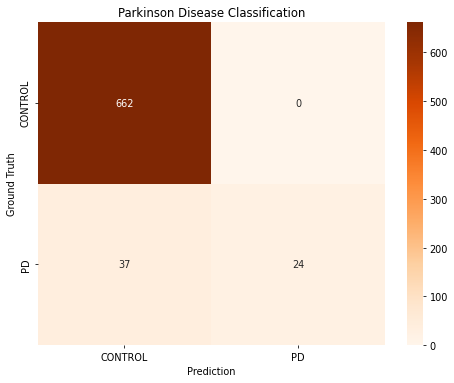

In [21]:
import seaborn as sns
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='r')
ax = sns.heatmap(cm, cmap='Oranges',annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Parkinson Disease Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

In [22]:
print(classification_report(test_labels_final,pred_labels))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       662
         1.0       1.00      0.39      0.56        61

    accuracy                           0.95       723
   macro avg       0.97      0.70      0.77       723
weighted avg       0.95      0.95      0.94       723



In [23]:
print(accuracy_score(test_labels_final,pred_labels))

0.9488243430152143


In [25]:
model.save('parkinson.h5')

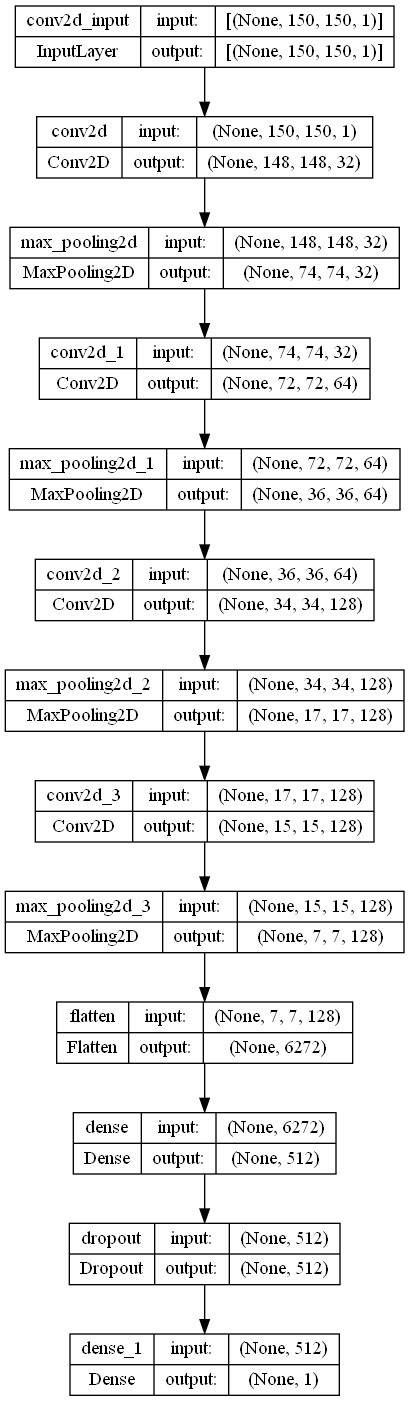

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

saved_model = tf.keras.models.load_model("parkinson.h5")

#Show Model Architecture
plot_model(saved_model,
          to_file='model.png',
          show_shapes=True,
          show_layer_names=True)